# Importing basic Packages

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('bank-full.csv')

In [3]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

# Importing Packages

In [4]:
!pip install pydotplus
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier,export_graphviz

from IPython.display import Image
from os import system

from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.externals.six import StringIO
from statistics import median,mean
import graphviz
import pydotplus

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,precision_score,recall_score

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [5]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
df.shape

(45211, 17)

In [7]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [8]:
df[['job','marital','education','default','housing','loan','contact','month','poutcome','Target']] = df[['job','marital','education','default','housing','loan','contact','month','poutcome','Target']].apply(pd.Categorical)

In [9]:
df.dtypes.to_frame('Datatypes of Attributes').T

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
Datatypes of Attributes,int64,category,category,category,category,int64,category,category,category,int64,category,int64,int64,int64,int64,category,category


In [10]:
df['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


# Distribution of Numerical Columns

C:\Users\LENOVO\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


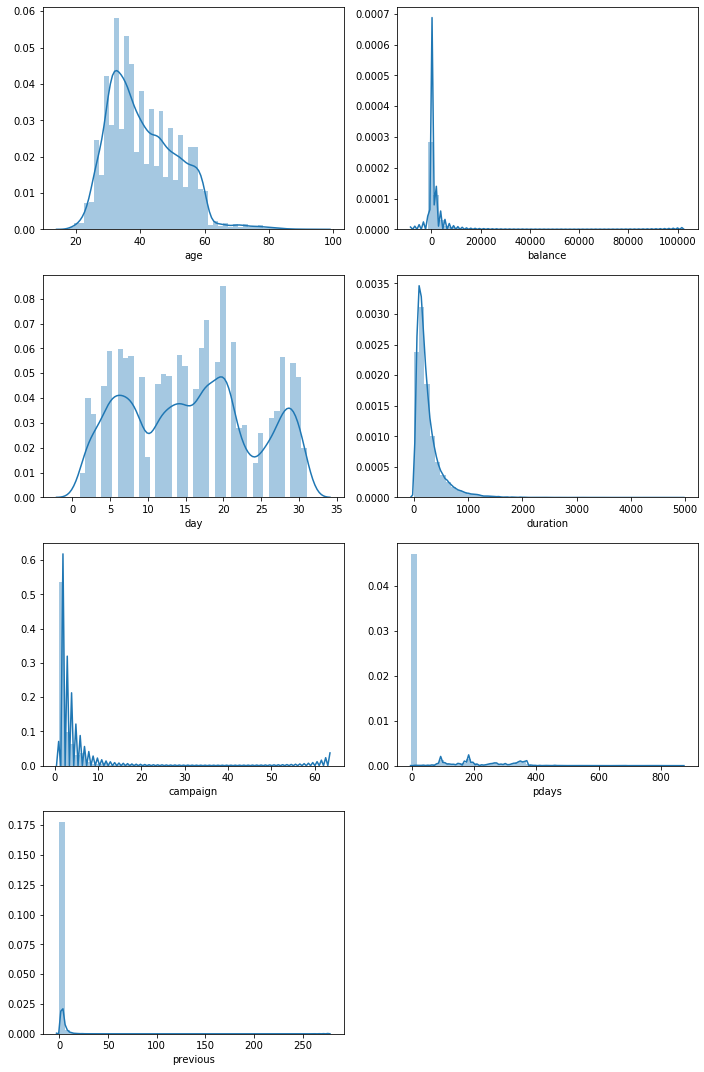

In [12]:
fig, axe = plt.subplots(nrows=4, ncols=2, figsize=(10, 15)) 
axe = axe.flatten()
sns.distplot(df['age'],ax=axe[0])
sns.distplot(df['balance'],ax=axe[1])
sns.distplot(df['day'],ax=axe[2])
sns.distplot(df['duration'],ax=axe[3])
sns.distplot(df['campaign'],ax=axe[4])
sns.distplot(df['pdays'],ax=axe[5],kde_kws = {'bw' : 1})
sns.distplot(df['previous'],ax=axe[6],kde_kws = {'bw' : 1}) 
fig.tight_layout() 
fig.show()
axe.flat[-1].set_visible(False)


# Distribution of Categorical Columns

C:\Users\LENOVO\anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


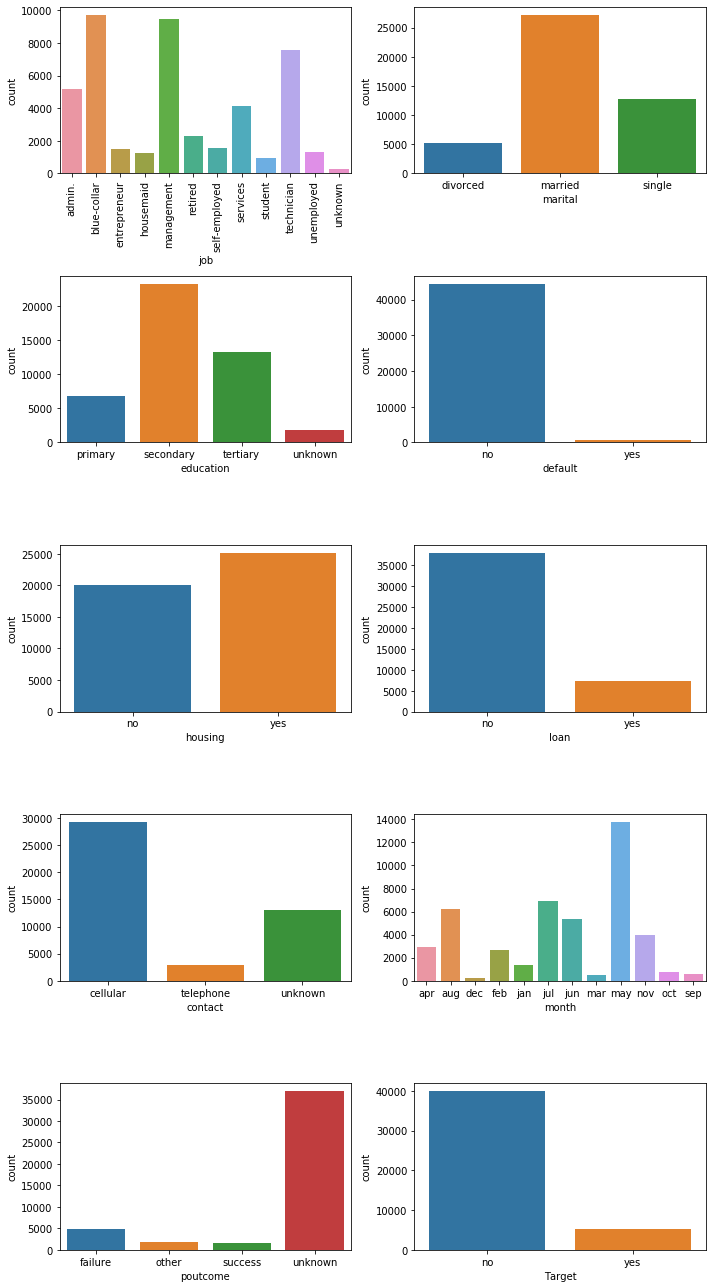

In [13]:
fig, axe = plt.subplots(nrows=5, ncols=2, figsize=(10, 18)) 
axe = axe.flatten() 
plot=sns.countplot(x=df['job'],data=df,ax=axe[0])
plt.setp(plot.get_xticklabels(), rotation=90)
sns.countplot(x=df['marital'],data=df,ax=axe[1])
sns.countplot(x=df['education'],data=df,ax=axe[2]) 
sns.countplot(x=df['default'],data=df,ax=axe[3])
sns.countplot(x=df['housing'],data=df,ax=axe[4])
sns.countplot(x=df['loan'],data=df,ax=axe[5])
sns.countplot(x=df['contact'],data=df,ax=axe[6]) 
sns.countplot(x=df['month'],data=df,ax=axe[7])
sns.countplot(x=df['poutcome'],data=df,ax=axe[8])
sns.countplot(x=df['Target'],data=df,ax=axe[9]) 
fig.tight_layout()
fig.show() 

# Checking the Presence of Outliers

C:\Users\LENOVO\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


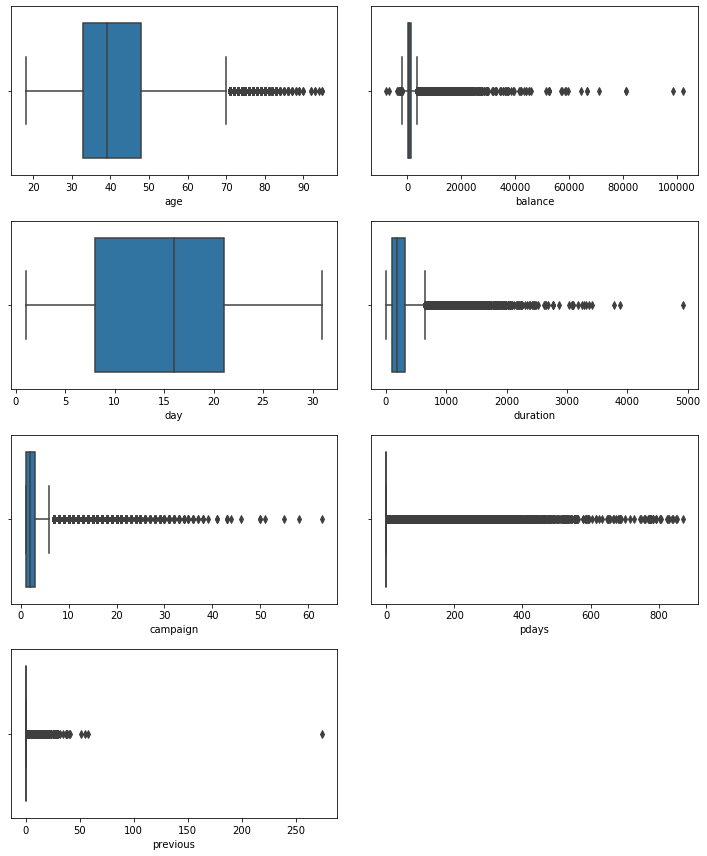

In [14]:
fig, axe = plt.subplots(nrows=4, ncols=2, figsize=(10, 12))
axe = axe.flatten()
sns.boxplot(x='age',data=df,ax=axe[0])
sns.boxplot(x='balance',data=df,ax=axe[1])
sns.boxplot(x='day',data=df,ax=axe[2])
sns.boxplot(x='duration',data=df,ax=axe[3])
sns.boxplot(x='campaign',data=df,ax=axe[4])
sns.boxplot(x='pdays',data=df,ax=axe[5])
sns.boxplot(x='previous',data=df,ax=axe[6])
fig.tight_layout()
fig.show()
axe.flat[-1].set_visible(False)

In [15]:
df['Target'].value_counts().to_frame('Distriution of Target Column ')

,Distriution of Target Column
no,39922
yes,5289


# Label Encoding

In [16]:
df_2 = df.copy() 
en = LabelEncoder()
df_2['default'] = en.fit_transform(df_2['default']).astype(int)
df_2['marital'] = en.fit_transform(df_2['marital']).astype(int)
df_2['loan'] = en.fit_transform(df_2['loan']).astype(int) 
df_2['housing'] = en.fit_transform(df_2['housing']).astype(int)
df_2['Target'] = en.fit_transform(df_2['Target']).astype(int)
df_2['month'] = en.fit_transform(df_2['month']).astype(int)
df_2['poutcome'] = en.fit_transform(df_2['poutcome']).astype(int)
df_2['education'] = en.fit_transform(df_2['education']).astype(int)
df_2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,1,2,0,2143,1,0,unknown,5,8,261,1,-1,0,3,0
1,44,technician,2,1,0,29,1,0,unknown,5,8,151,1,-1,0,3,0
2,33,entrepreneur,1,1,0,2,1,1,unknown,5,8,76,1,-1,0,3,0
3,47,blue-collar,1,3,0,1506,1,0,unknown,5,8,92,1,-1,0,3,0
4,33,unknown,2,3,0,1,0,0,unknown,5,8,198,1,-1,0,3,0


In [17]:
df_2[['job','marital','education','default','housing','loan','contact','month','poutcome','Target']] = df_2[['job','marital','education','default','housing','loan','contact','month','poutcome','Target']].apply(pd.Categorical)

In [18]:
df_2.dtypes.to_frame('Datatypes').T

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
Datatypes,int64,category,category,category,category,int64,category,category,category,int64,category,int64,int64,int64,int64,category,category


# Handling Outliers with Mean Replacement

In [19]:
meanbal = float(df_2['balance'].mean())
df_2['balance'] = np.where(df_2['balance'] >np.percentile(df_2['balance'], 75), meanbal,df_2['balance'])
meandur = float(df_2['duration'].mean())
df_2['duration'] = np.where(df_2['duration'] >np.percentile(df_2['duration'], 75), meandur,df_2['duration'])
meancam = float(df_2['campaign'].mean())
df_2['campaign'] = np.where(df_2['campaign'] >np.percentile(df_2['campaign'], 75), meancam,df_2['campaign'])
meanpd = float(df_2['pdays'].mean())
df_2['pdays'] = np.where(df_2['pdays'] >np.percentile(df_2['pdays'], 75), meanpd,df_2['pdays'])
meanpr = float(df_2['previous'].mean())
df_2['previous'] = np.where(df_2['previous'] >np.percentile(df_2['previous'], 75),meanpr ,df_2['previous'])

C:\Users\LENOVO\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


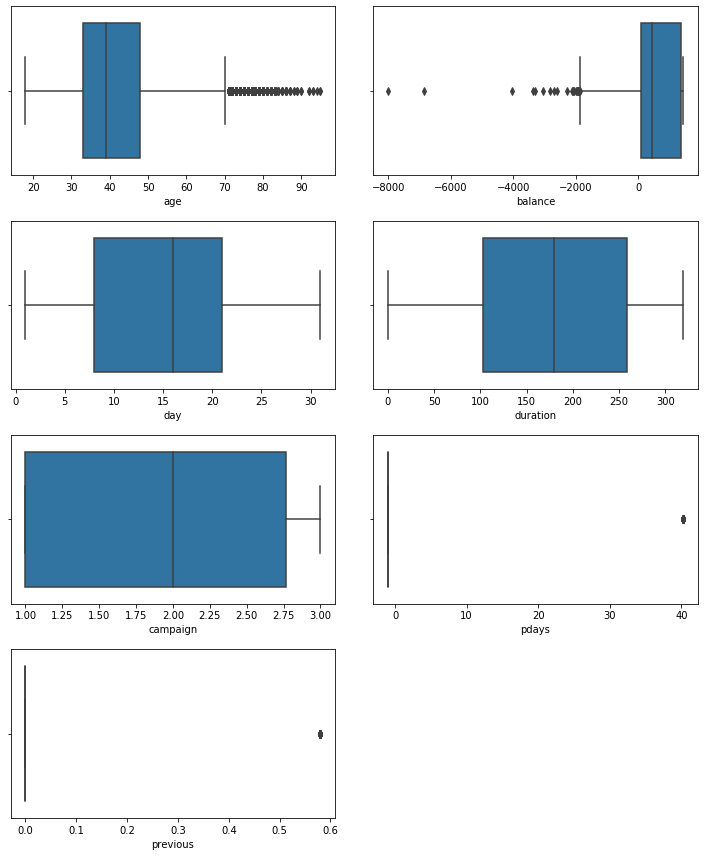

In [20]:
fig, axe = plt.subplots(nrows=4, ncols=2, figsize=(10, 12))
axe = axe.flatten()
sns.boxplot(x='age',data=df_2,ax=axe[0]) 
sns.boxplot(x='balance',data=df_2,ax=axe[1])
sns.boxplot(x='day',data=df_2,ax=axe[2])
sns.boxplot(x='duration',data=df_2,ax=axe[3]) 
sns.boxplot(x='campaign',data=df_2,ax=axe[4])
sns.boxplot(x='pdays',data=df_2,ax=axe[5])
sns.boxplot(x='previous',data=df_2,ax=axe[6]) 
fig.tight_layout()
fig.show()
axe.flat[-1].set_visible(False)

# Correlation Plot for all Features

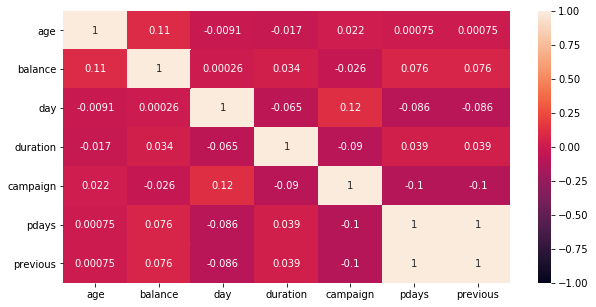

In [21]:
plt.figure(figsize=(10,5))
sns.heatmap(df_2.corr(),annot=True,vmax=1,vmin=-1)

In [22]:
df_2 = df_2.drop(['job','education','contact','duration','pdays','day','month'],axis=1) 
df_2.head()

,age,marital,default,balance,housing,loan,campaign,previous,poutcome,Target
0,58,1,0,1362.272058,1,0,1.0,0.0,3,0
1,44,2,0,29.000000,1,0,1.0,0.0,3,0
2,33,1,0,2.000000,1,1,1.0,0.0,3,0
3,47,1,0,1362.272058,1,0,1.0,0.0,3,0
4,33,2,0,1.000000,0,0,1.0,0.0,3,0


# Pairplot of Features

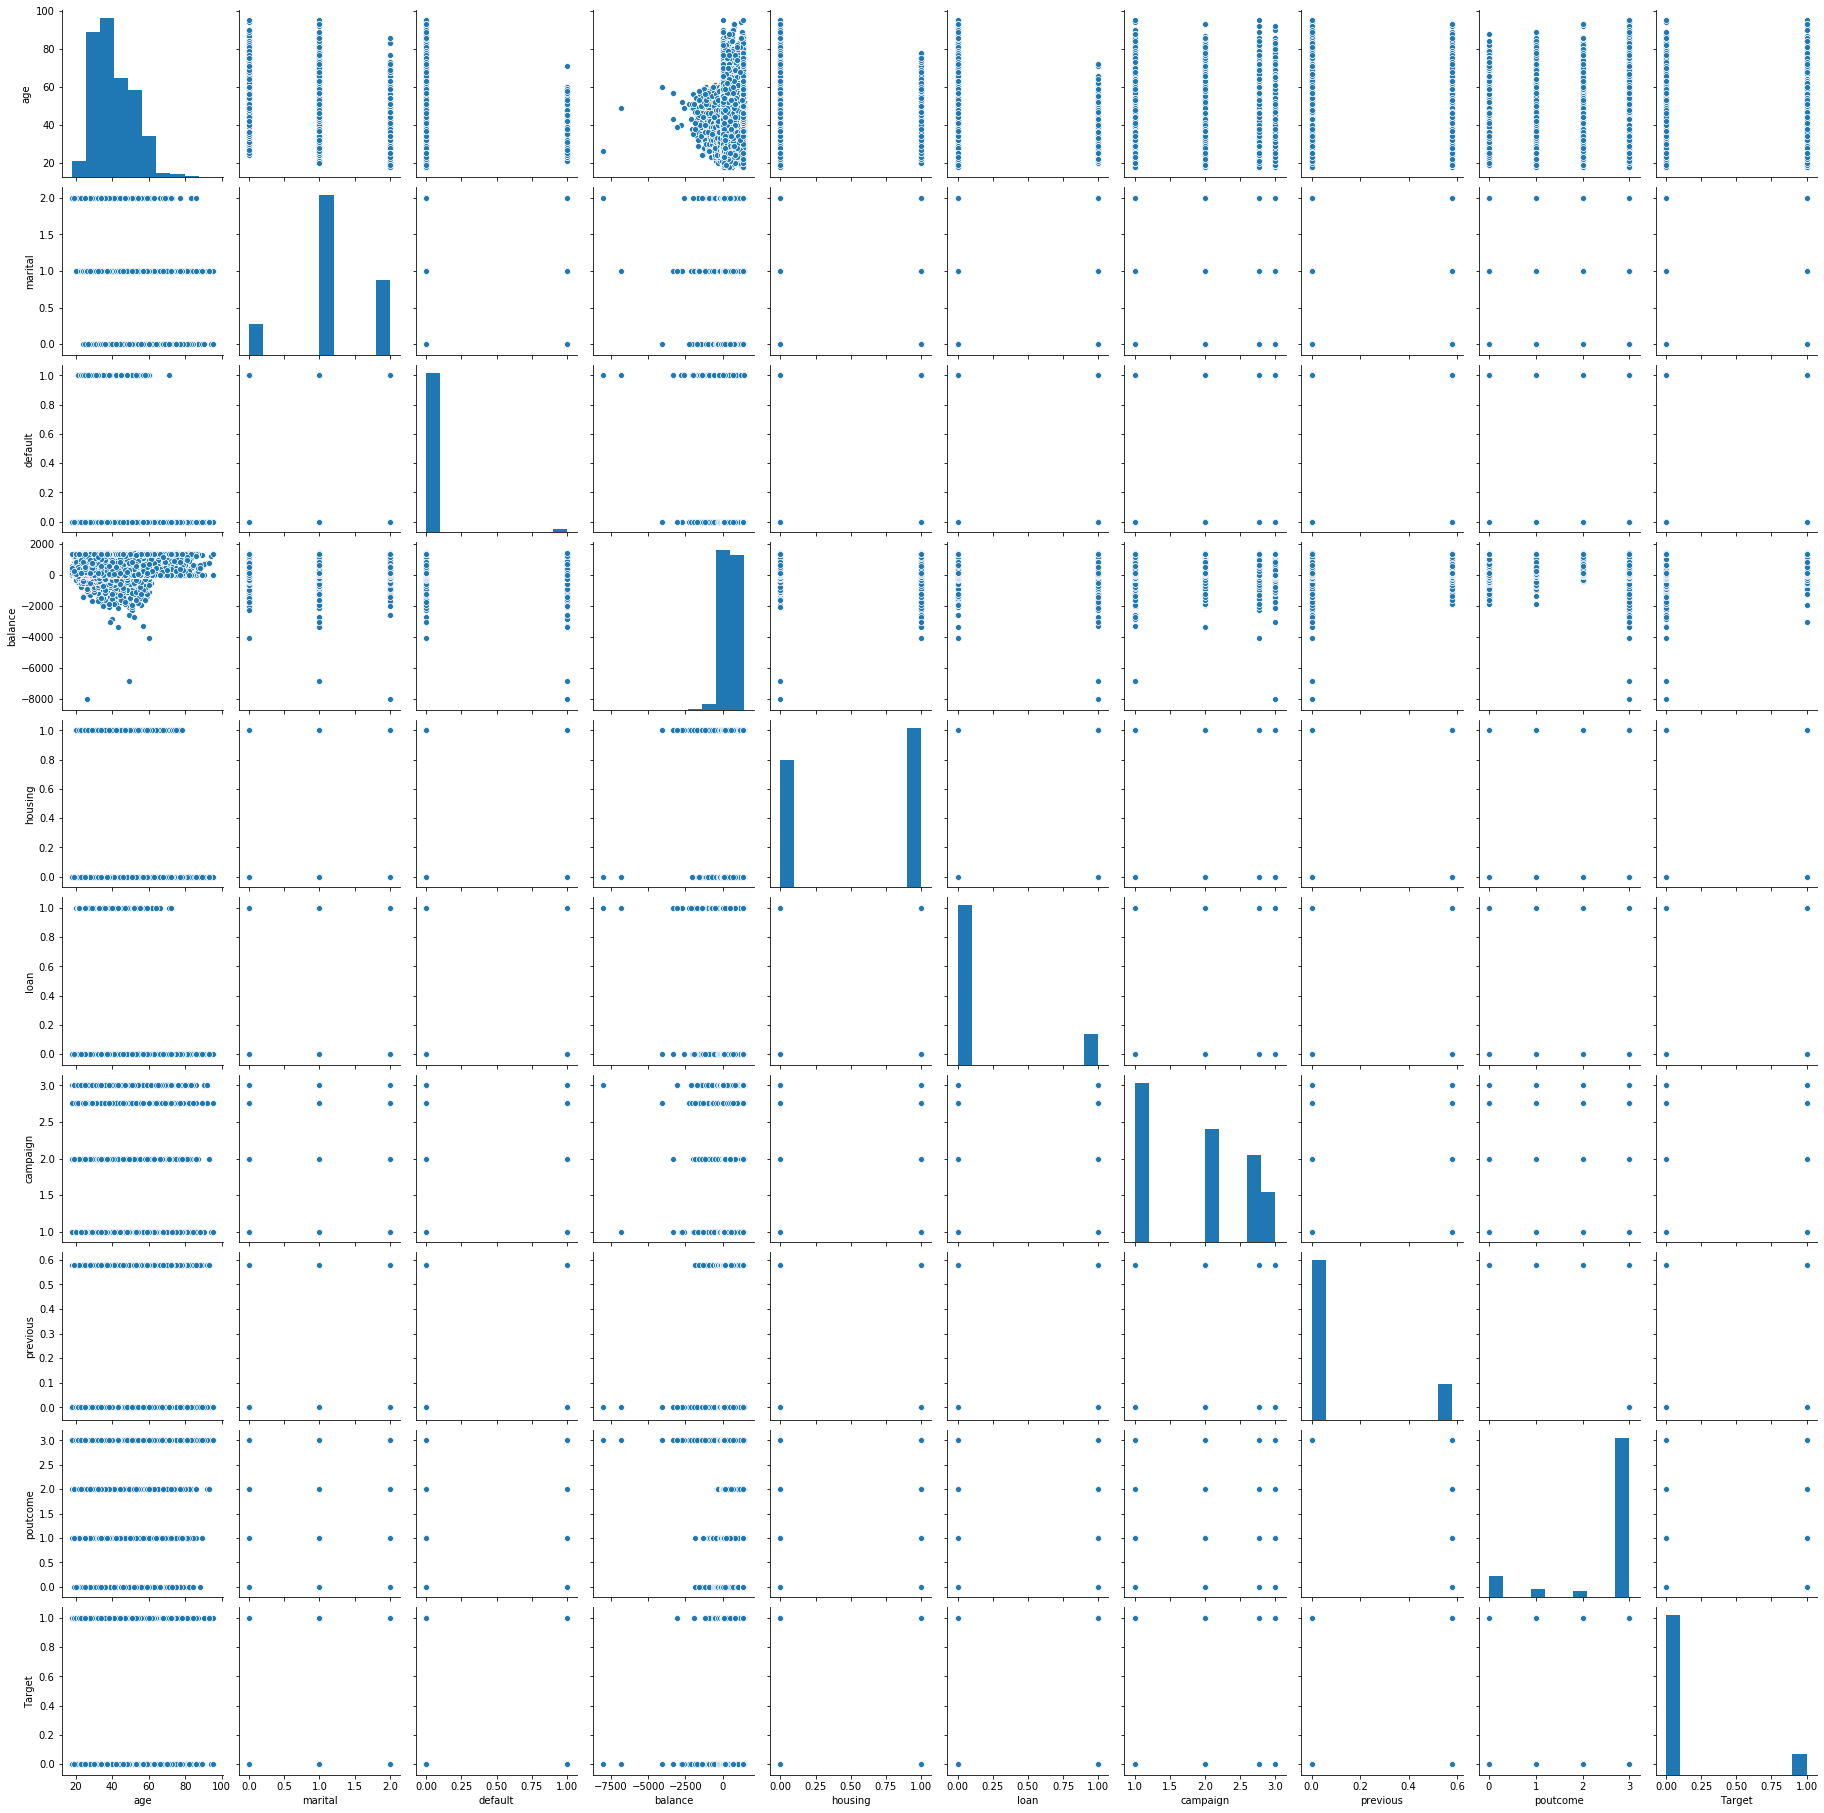

In [23]:
sns.pairplot(df_2)

# Splitting into train and test

In [24]:
X = df_2.drop('Target',axis=1)
y = df_2['Target']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=1)

In [25]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Logistic Regression

In [26]:
logr = LogisticRegression(solver='liblinear')
logr.fit(X_train_scaled,y_train)
y_pred = logr.predict(X_test_scaled)

In [27]:
print('Confusion Matrix\n',confusion_matrix(y_test,y_pred)) #for confusion matrix
print(' '*30)

print(' '*30)
LR_accuracy = accuracy_score(y_test,y_pred)
print('Accuracy of Logistic Regression :{:.2f}'.format(LR_accuracy)) #for accuracy score
print(' '*30)

print('Classification Report\n',classification_report(y_test,y_pred)) #for classification report


Confusion Matrix
 [[11897   116]
 [ 1310   241]]
                              
                              
Accuracy of Logistic Regression :0.89
                              
Classification Report
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     12013
           1       0.68      0.16      0.25      1551

    accuracy                           0.89     13564
   macro avg       0.79      0.57      0.60     13564
weighted avg       0.87      0.89      0.86     13564



# Naive Bayes

In [28]:
NB = GaussianNB()
NB.fit(X_train_scaled,y_train)
y_predi = NB.predict(X_test_scaled)

In [29]:
print('Confusion Matrix\n',confusion_matrix(y_test,y_predi))
print(' '*30)
NB_accuracy = accuracy_score(y_test,y_predi)
print('Accuracy of Naive Bayes :{:.2f}'.format(NB_accuracy))
print(' '*30)
print('Classification Report\n',classification_report(y_test,y_predi))
print(' '*63)

Confusion Matrix
 [[10745  1268]
 [ 1045   506]]
                              
Accuracy of Naive Bayes :0.83
                              
Classification Report
               precision    recall  f1-score   support

           0       0.91      0.89      0.90     12013
           1       0.29      0.33      0.30      1551

    accuracy                           0.83     13564
   macro avg       0.60      0.61      0.60     13564
weighted avg       0.84      0.83      0.83     13564

                                                               


# K-Nearest Neighbor

In [30]:
knn = KNeighborsClassifier(n_neighbors = 3)  #Instantiate KNN with k=3
knn.fit(X_train_scaled,y_train) #Call the fit method of KNN to train the model or to learn the parameters of model
y_predict = knn.predict(X_test_scaled) #Predict 


print('Confusion Matrix\n',confusion_matrix(y_test,y_predi)) #for confusion matrix
print(' '*30)
KNN_accuracy = accuracy_score(y_test,y_predict)
print('Accuracy of KNN :{:.2f}'.format(KNN_accuracy)) #for accuracy score
print(' '*30)
print('Classification Report\n',classification_report(y_test,y_predi))

Confusion Matrix
 [[10745  1268]
 [ 1045   506]]
                              
Accuracy of KNN :0.87
                              
Classification Report
               precision    recall  f1-score   support

           0       0.91      0.89      0.90     12013
           1       0.29      0.33      0.30      1551

    accuracy                           0.83     13564
   macro avg       0.60      0.61      0.60     13564
weighted avg       0.84      0.83      0.83     13564



optimal k is 13


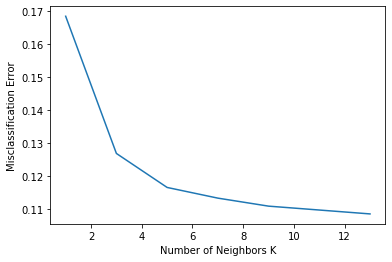

In [31]:
oddList = list(np.arange(1,15))
neighbors = list(filter(lambda x: x % 2 != 0, oddList)) 

accuracy_list = [] 

for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors = i) 
    knn.fit(X_train_scaled,y_train) 
    y_pred = knn.predict(X_test_scaled) 
    accuracy_s = accuracy_score(y_test,y_pred) 
    accuracy_list.append(accuracy_s) 
    
MSE=[1 - j for j in accuracy_list] 
optimal = neighbors[MSE.index(min(MSE))] 
print('optimal k is',optimal) 

plt.plot(neighbors,MSE)
plt.xlabel('Number of Neighbors K') 
plt.ylabel('Misclassification Error') 
plt.show()

# Support Vector Machine

In [32]:
svc = SVC()
svc.fit(X_train_scaled,y_train)
predicted_svc = svc.predict(X_test_scaled)


print('Confusion Matrix\n',confusion_matrix(y_test,predicted_svc))
print(' '*30)
SVC_accuracy = accuracy_score(y_test,predicted_svc)
print('Accuracy of SVC :',SVC_accuracy)
print(' '*30)
print('Classification Report\n',classification_report(y_test,predicted_svc))

Confusion Matrix
 [[11867   146]
 [ 1273   278]]
                              
Accuracy of SVC : 0.8953848422294308
                              
Classification Report
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     12013
           1       0.66      0.18      0.28      1551

    accuracy                           0.90     13564
   macro avg       0.78      0.58      0.61     13564
weighted avg       0.87      0.90      0.87     13564



# Decision Tree

In [33]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)
predicted_DT = dTree.predict(X_test)


print('Confusion Matrix\n',confusion_matrix(y_test,predicted_DT))
print(' '*30)
DT_accuracy = accuracy_score(y_test,predicted_DT)
print('Accuracy of Decision Tree :{:.2f}'.format(DT_accuracy))
print(' '*30)
print('Classification Report\n',classification_report(y_test,predicted_DT))


Confusion Matrix
 [[11020   993]
 [ 1190   361]]
                              
Accuracy of Decision Tree :0.84
                              
Classification Report
               precision    recall  f1-score   support

           0       0.90      0.92      0.91     12013
           1       0.27      0.23      0.25      1551

    accuracy                           0.84     13564
   macro avg       0.58      0.58      0.58     13564
weighted avg       0.83      0.84      0.83     13564



In [34]:
xvar = df_2.drop('Target', axis=1) 
feature_cols = xvar.columns
feat_importance = dTree.tree_.compute_feature_importances(normalize=False)


feat_imp_dict = dict(zip(feature_cols, dTree.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)

,0
balance,0.442826
age,0.248702
poutcome,0.095115
campaign,0.086817
marital,0.040698
previous,0.034347
loan,0.025493
housing,0.022714
default,0.003286


In [35]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR.fit(X_train, y_train)
predicted_DTR = dTreeR.predict(X_test)

print('Confusion Matrix\n',confusion_matrix(y_test,predicted_DTR))
print(' '*30)
DTR_accuracy = accuracy_score(y_test,predicted_DTR)
print('Accuracy of Decision Tree with Regularization:{:.2f}'.format(DTR_accuracy))
print(' '*30)
print('Classification Report\n',classification_report(y_test,predicted_DTR))

Confusion Matrix
 [[11826   187]
 [ 1237   314]]
                              
Accuracy of Decision Tree with Regularization:0.90
                              
Classification Report
               precision    recall  f1-score   support

           0       0.91      0.98      0.94     12013
           1       0.63      0.20      0.31      1551

    accuracy                           0.90     13564
   macro avg       0.77      0.59      0.62     13564
weighted avg       0.87      0.90      0.87     13564



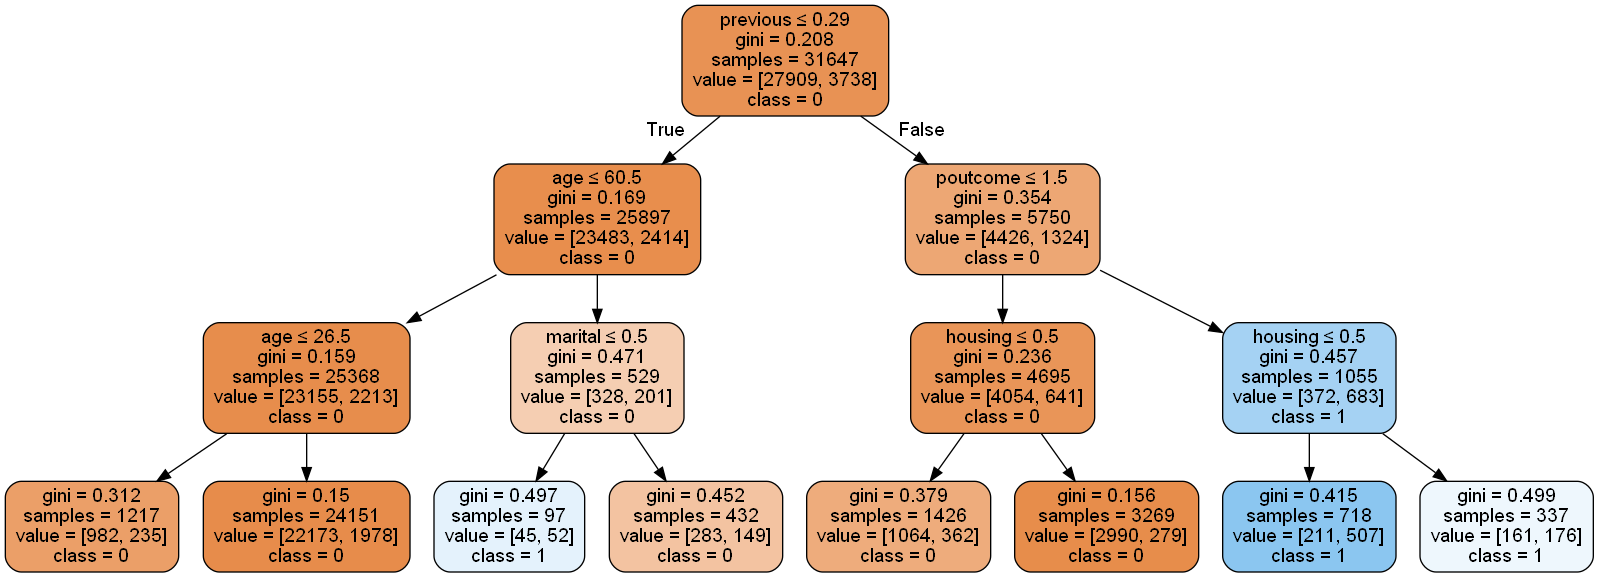

In [36]:
dot_data = StringIO() 
export_graphviz(dTreeR, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Project3.png')
Image(graph.create_png())

In [37]:
feat_importance = dTreeR.tree_.compute_feature_importances(normalize=False) 


feat_imp_dict = dict(zip(feature_cols, dTreeR.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False) 

,0
poutcome,0.547320
previous,0.215141
age,0.142976
housing,0.087515
marital,0.007048
default,0.000000
balance,0.000000
loan,0.000000
campaign,0.000000


# Bagging

In [38]:
bagc = BaggingClassifier(base_estimator=dTree, n_estimators=500,random_state=1)
bagc = bagc.fit(X_train, y_train)
predicted_BAG = bagc.predict(X_test)



print('Confusion Matrix\n',confusion_matrix(y_test,predicted_BAG))
print(' '*30)
BAG_accuracy = accuracy_score(y_test,predicted_BAG)
print('Accuracy of Decision Tree :{:.2f}'.format(BAG_accuracy)) 
print(' '*30)
print('Classification Report\n',classification_report(y_test,predicted_BAG)) 

Confusion Matrix
 [[11617   396]
 [ 1220   331]]
                              
Accuracy of Decision Tree :0.88
                              
Classification Report
               precision    recall  f1-score   support

           0       0.90      0.97      0.93     12013
           1       0.46      0.21      0.29      1551

    accuracy                           0.88     13564
   macro avg       0.68      0.59      0.61     13564
weighted avg       0.85      0.88      0.86     13564



# Ada Boost

In [39]:
adab = AdaBoostClassifier(n_estimators=50, random_state=1)
adab = adab.fit(X_train, y_train)
predicted_ADA = adab.predict(X_test)

print('Confusion Matrix\n',confusion_matrix(y_test,predicted_ADA)) 
print(' '*30)
ADA_accuracy = accuracy_score(y_test,predicted_ADA)
print('Accuracy of KNN :{:.2f}'.format(ADA_accuracy))
print(' '*30)
print('Classification Report\n',classification_report(y_test,predicted_ADA))

Confusion Matrix
 [[11884   129]
 [ 1309   242]]
                              
Accuracy of KNN :0.89
                              
Classification Report
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     12013
           1       0.65      0.16      0.25      1551

    accuracy                           0.89     13564
   macro avg       0.78      0.57      0.60     13564
weighted avg       0.87      0.89      0.86     13564



# GradientBoosting

In [40]:
gradb = GradientBoostingClassifier(n_estimators = 100,random_state=1)
gradb = gradb.fit(X_train, y_train)
predicted_GRAD = gradb.predict(X_test)



print('Confusion Matrix\n',confusion_matrix(y_test,predicted_GRAD))
print(' '*30)
GRAD_accuracy = accuracy_score(y_test,predicted_GRAD)
print('Accuracy of KNN :{:.2f}'.format(GRAD_accuracy))
print(' '*30)
print('Classification Report\n',classification_report(y_test,predicted_GRAD))

Confusion Matrix
 [[11889   124]
 [ 1305   246]]
                              
Accuracy of KNN :0.89
                              
Classification Report
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     12013
           1       0.66      0.16      0.26      1551

    accuracy                           0.89     13564
   macro avg       0.78      0.57      0.60     13564
weighted avg       0.87      0.89      0.86     13564



# Random Forest

In [41]:
randf = RandomForestClassifier(n_estimators = 100, random_state=1, max_features=3)
randf = randf.fit(X_train, y_train)
predicted_RAN = randf.predict(X_test)


print('Confusion Matrix\n',confusion_matrix(y_test,predicted_RAN ))
print(' '*30)
RAN_accuracy = accuracy_score(y_test,predicted_RAN )
print('Accuracy of KNN :{:.2f}'.format(RAN_accuracy))
print(' '*30)
print('\n Classification Report\n',classification_report(y_test,predicted_RAN ))

Confusion Matrix
 [[11588   425]
 [ 1211   340]]
                              
Accuracy of KNN :0.88
                              

 Classification Report
               precision    recall  f1-score   support

           0       0.91      0.96      0.93     12013
           1       0.44      0.22      0.29      1551

    accuracy                           0.88     13564
   macro avg       0.67      0.59      0.61     13564
weighted avg       0.85      0.88      0.86     13564



# Accuracy Scores of all the Models

In [42]:
Scores = [('Naive bayes', NB_accuracy),
      ('KNN', KNN_accuracy),
      ('Logistic Regression', LR_accuracy),
      ('SVC', SVC_accuracy ),
      ('Decision Tree',DT_accuracy),
      ('Decision Tree with Regularization',DTR_accuracy),
      ('Bagging',BAG_accuracy),
      ('Adaptive Boosting',ADA_accuracy),
      ('Gradient Boosting',GRAD_accuracy),
      ('Random Forest N=100',RAN_accuracy)] 

Scores = pd.DataFrame(Scores,columns=['Model','Accuracy score']) 

print('\033[1m''Current Scores with Outliers replaced with mean:')
Scores.sort_values(by='Accuracy score',ascending=False)

Current Scores with Outliers replaced with mean:


,Model,Accuracy score
3,SVC,0.895385
5,Decision Tree with Regularization,0.895016
2,Logistic Regression,0.894869
8,Gradient Boosting,0.894648
7,Adaptive Boosting,0.893984
6,Bagging,0.880861
9,Random Forest N=100,0.879387
1,KNN,0.873120
4,Decision Tree,0.839059
0,Naive bayes,0.829475


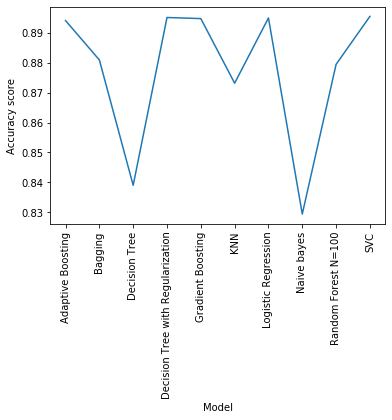

In [43]:
sns.lineplot(x=Scores['Model'],y=Scores['Accuracy score'],data=Scores,markers=True, dashes=False) #Countplot of Scores
plt.xticks(rotation=90)
plt.show()